The sinking of the Titanic is an event that shocked the world, almost everyone knows this incident. This is a dataset analysis project from Titanic containing passenger data. We will analyze whether a passenger survived or not in this incident by using the existing features.

Here there are 2 datasets, namely train and test in .csv format.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

# Data Exploration

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The first one we will analyze is the train dataset. The train data set consists of the following columns:

Survived => 0 : no / 1 : yes

Pclass (Class Ticket) => 1 : 1st / 2 : 2nd / 3 : 3rd

Name

Sex => 0 : man / 1 : woman

Age

Sibsp (of siblings / spouses aboard the Titanic)

Parch (of parents / children aboard the Titanic)

Ticket (Ticket Number)

Fare (Passenger Fare)

Cabin (Kabin Number) 

Embarked (Port of Embarkation) => C : Cherbourg / Q = Queenstown / S = Southampton

## Contionus Variable 

### Age

Age between 15 - 20 years old are more likely to survive

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

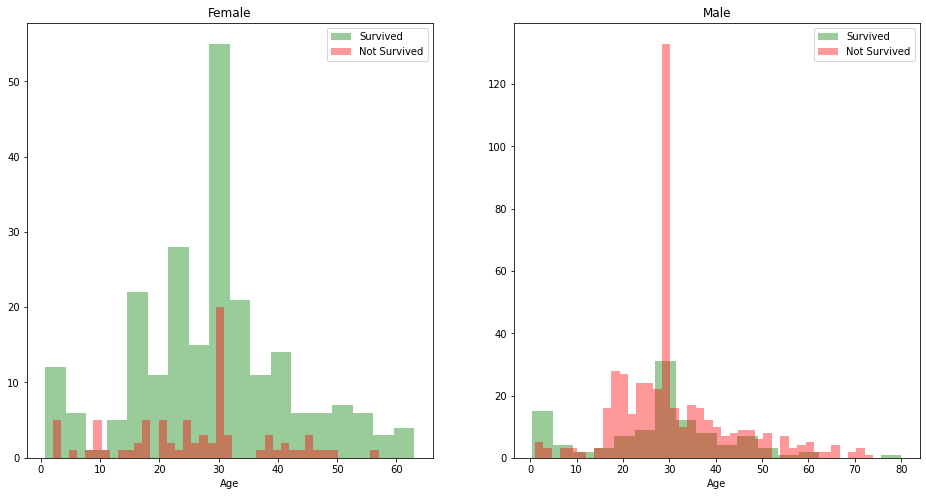

In [5]:
train['Age'].fillna(value = round(np.mean(train['Age'])), inplace=True)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women.Survived == 1].Age, bins =18, label = 'Survived', ax=axes[0], kde=False, color='green')
ax = sns.distplot(women[women.Survived == 0].Age, bins=40, label = 'Not Survived', ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax1 = sns.distplot(men[men.Survived == 1].Age, bins = 18, label = 'Survived', ax = axes[1], kde = False, color = 'green')
ax1 = sns.distplot(men[men.Survived == 0].Age, bins = 40, label = 'Not Survived', ax = axes[1], kde = False, color = 'red')
ax1.legend()
ax1.set_title('Male')

### Pclass
You have a higher chance of surviving if you have a first class ticket than having a second or thir.d

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

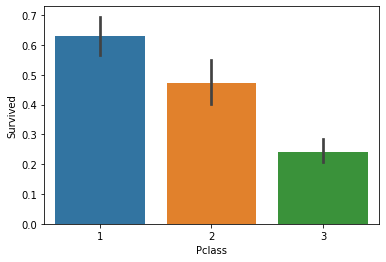

In [6]:
sns.barplot(data=train, x='Pclass', y='Survived')

### Relatives
You are more likely to survive if you are travels with 1 to 3 people and if you have 0 or more than three you have a less chance.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


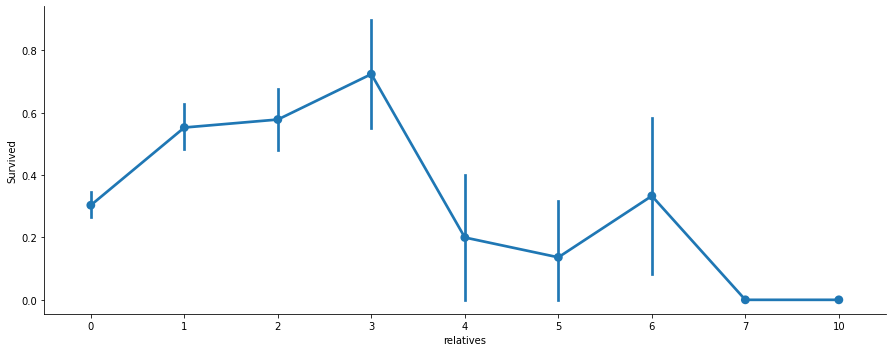

In [7]:
train['relatives'] = train['SibSp'] + train['Parch']
train.loc[train['relatives'] > 0, 'travelled_alone'] = 'No'
train.loc[train['relatives'] == 0, 'travelled_alone'] = 'Yes'
sns.factorplot(data = train, x ='relatives', y='Survived', aspect = 2.5)

In [8]:
cont_var = train[['SibSp', 'Parch', 'Fare']]

## Discrete Variable

### Sex

Women and Children were the first to board the titanic which means they are more likely to survive than man.

In [9]:
women = train.loc[train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)
print('% of women who survived :', rate_women )

% of women who survived : 0.7420382165605095


In [10]:
men = train.loc[train.Sex == 'male']['Survived']
rate_men = sum(men) / len(men)
print('% of women who survived :', rate_men)

% of women who survived : 0.18890814558058924


### Embarked
Women will survive more if they embarked from port ‘Southampton’ or ‘ Queenstown’. While men will survive more from the port 'Cherbourg'. Passengers from port ‘Southampton’ have a low survival rate of 34%, while those from the port ‘Cherbourg’ have a survival rate of 55%. Over 72% of the passengers embarked from the port 'Southampton’, 18% from the port ‘Cherbourg’ and the rest from the port ‘Queenstown’.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


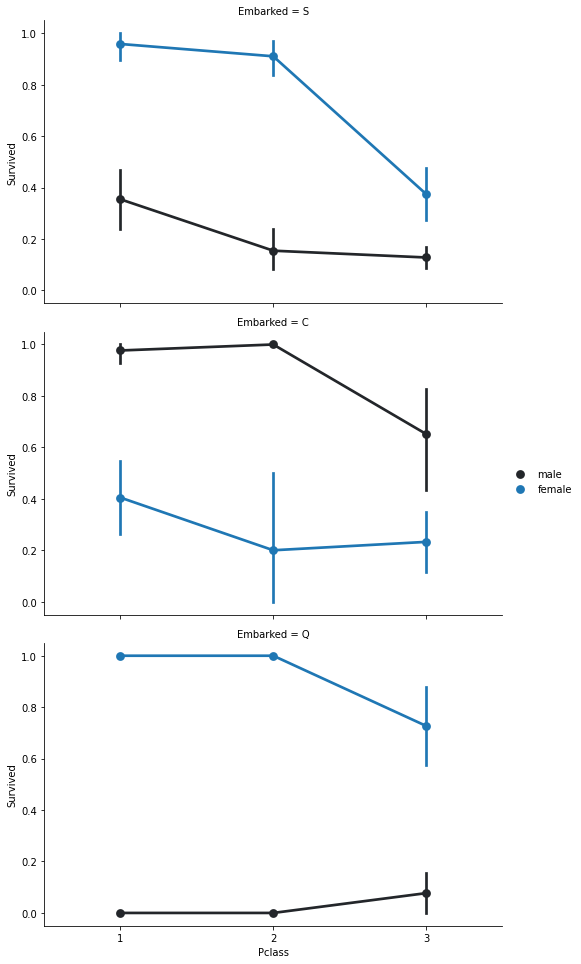

In [11]:
plot = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
plot.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
plot.add_legend()

<AxesSubplot:xlabel='Survived', ylabel='count'>

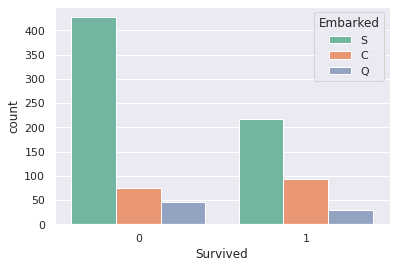

In [12]:
sns.set(style='darkgrid')
sns.countplot(data=train, x='Survived', hue='Embarked', palette='Set2')

In [13]:
disc_var = train[['Ticket', 'Cabin']]

# Feature Engineering
1) Cabin - simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)

2) Tickets - Do different ticket types impact survival rates?

3) Does a person's title realte to survival rates?

### Cabin

In [14]:
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [15]:
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])
print(train.cabin_adv.value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


In [16]:
pd.pivot_table(train, index='Survived', columns='cabin_adv', values='Ticket', aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


### Ticket

In [17]:
pd.set_option('max_rows', None)
train['Ticket'].value_counts()

347082                7
CA. 2343              7
1601                  7
3101295               6
CA 2144               6
347088                6
S.O.C. 14879          5
382652                5
LINE                  4
PC 17757              4
17421                 4
349909                4
113760                4
4133                  4
113781                4
W./C. 6608            4
2666                  4
19950                 4
347077                4
C.A. 31921            3
PC 17572              3
C.A. 34651            3
363291                3
F.C.C. 13529          3
345773                3
248727                3
24160                 3
29106                 3
SC/Paris 2123         3
35273                 3
371110                3
230080                3
PC 17760              3
239853                3
PC 17582              3
347742                3
110152                3
13502                 3
110413                3
PC 17755              3
PC 17558              2
237736          

In [18]:
train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)

In [19]:
train['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [20]:
pd.set_option('max_rows', None)
train['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [21]:
pd.pivot_table(train, index='Survived', columns='numeric_ticket', values='Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


### Person's titles

In [22]:
train['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [23]:
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
train['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

# Data Preprocessing for Model
1) Drop null values from Embarked (only 2) and other null value from another feature

2) Include only relevant variables (Since we have limited data, I wanted to exclude things like name and passanger ID so that we could have a reasonable number of features for our models to deal with)

Variables: 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'

3) Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums. We also may be able to infer something about the shape of the test data through this method. I will stress, this is generally not recommend outside of a competition (use onehot encoder).

4) Impute data with mean for fare and age (Should also experiment with median)

5) Normalized fare using logarithm to give more semblance of a normal distribution

6) Scaled data 0-1 with standard scaler

In [24]:
train['Sex'] = train['Sex'].replace(['male'], 0)
train['Sex'] = train['Sex'].replace(['female'], 1)
train['FirstClass'] = train['Pclass'].apply(lambda x:1 if x == 1 else 0)
train['SecondClass'] = train['Pclass'].apply(lambda x:1 if x == 2 else 0)

In [25]:
train['Embarked'] = train['Embarked'].dropna()
#train['Embarked'] = train['Embarked'].map({'C' : 1, 'Q' : 2, 'S' : 3})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,relatives,travelled_alone,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title,FirstClass,SecondClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,S,1,No,0,n,0,a5,Mr,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,C,1,No,1,C,0,pc,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,Yes,0,n,0,stono2,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,S,1,No,1,C,1,0,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,S,0,Yes,0,n,1,0,Mr,0,0


### Dummy Variable
Dummy Variables are created to avoid categorical variables, so the dummy variable will change the category per variable to its own binary identifier.

In [26]:
features = train[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'cabin_multiple', 'numeric_ticket', 'FirstClass', 'SecondClass', 'cabin_adv', 'ticket_letters', 'name_title', 'Embarked']]
survival = train['Survived']

In [27]:
for col in features.columns[10:]:
    features = pd.get_dummies(features, columns = [col], prefix = [col])

In [28]:
pd.set_option('max_columns', None)
features.head()

,Pclass,Age,Sex,SibSp,Parch,Fare,cabin_multiple,numeric_ticket,FirstClass,SecondClass,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,ticket_letters_0,ticket_letters_a4,ticket_letters_a5,ticket_letters_as,ticket_letters_c,ticket_letters_ca,ticket_letters_casoton,ticket_letters_fa,ticket_letters_fc,ticket_letters_fcc,ticket_letters_pc,ticket_letters_pp,ticket_letters_ppp,ticket_letters_sc,ticket_letters_sca4,ticket_letters_scah,ticket_letters_scahbasle,ticket_letters_scow,ticket_letters_scparis,ticket_letters_soc,ticket_letters_sop,ticket_letters_sopp,ticket_letters_sotono2,ticket_letters_sotonoq,ticket_letters_sp,ticket_letters_stono2,ticket_letters_swpp,ticket_letters_wc,ticket_letters_wep,name_title_Capt,name_title_Col,name_title_Don,name_title_Dr,name_title_Jonkheer,name_title_Lady,name_title_Major,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,0,1,0,7.2500,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1,38.0,1,1,0,71.2833,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,3,26.0,1,0,0,7.9250,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,1,0,53.1000,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,3,35.0,0,0,0,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


### Splitting Data

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, survival, test_size = 0.7)

### Scaling Data

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features = scaler.fit_transform(x_train)
test_features = scaler.fit_transform(x_test)

# Test Dataset

In [31]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [33]:
test['cabin_multiple'] = test.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
test['cabin_adv'] = test.Cabin.apply(lambda x: str(x)[0])
test['numeric_ticket'] = test.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
test['ticket_letters'] = test.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)
test['name_title'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Sex'] = test['Sex'].replace(['male'], 0)
test['Sex'] = test['Sex'].replace(['female'], 1)
test['Age'].fillna(value = round(np.mean(test['Age'])), inplace=True)
test['FirstClass'] = test['Pclass'].apply(lambda x:1 if x == 1 else 0)
test['SecondClass'] = test['Pclass'].apply(lambda x:1 if x == 2 else 0)

In [34]:
datatest_features = test[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'cabin_multiple', 'numeric_ticket', 'FirstClass', 'SecondClass', 'cabin_adv', 'ticket_letters', 'name_title', 'Embarked']]

In [35]:
for col in datatest_features.columns[10:]:
    datatest_features = pd.get_dummies(datatest_features, columns = [col], prefix = [col])
    
test_passenger = scaler.fit_transform(test_features)

## Model

### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(train_features, y_train)

print(lr_model.score(train_features, y_train))
print(lr_model.score(test_features, y_test))

0.5660938114750853
-2.6543446145574524e+24


### KNN 

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 2).fit(train_features, y_train)
print(knn_model.score(train_features, y_train))
print(knn_model.score(test_features, y_test))

0.846441947565543
0.7131410256410257


### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

logr_model = LogisticRegression().fit(train_features, y_train)

print(logr_model.score(train_features, y_train))
print(logr_model.score(test_features, y_test))

0.8614232209737828
0.7660256410256411


### Support Vector Machines

In [39]:
from sklearn.svm import SVC

svc_model = SVC(C = 50).fit(train_features, y_train)

print(svc_model.score(train_features, y_train))
print(svc_model.score(test_features, y_test))

0.9363295880149812
0.7467948717948718


### Decision Trees

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier().fit(train_features, y_train)

print(tree_model.score(train_features, y_train))
print(tree_model.score(test_features, y_test))

0.9962546816479401
0.7483974358974359


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rforest_model = RandomForestClassifier(n_estimators = 150).fit(train_features, y_train)

print(rforest_model.score(train_features, y_train))
print(rforest_model.score(test_features, y_test))

0.9962546816479401
0.7740384615384616


In [42]:
logr_survived = logr_model.predict(test_passenger)
passengerID = test['PassengerId']
result = list(zip(passengerID, svc_survived))
logr_result = pd.DataFrame(result, columns = ['PassengerId', 'Survived'])
fl = logr_result.to_csv('logr_result.csv', index = False)
print(fl)

NameError: name 'svc_survived' is not defined

## Conclusion
​
After we create several machine learning models using the train dataset, here are the predicted results:
​
###### Linear Regression : 42%
###### KNN : 83%
###### Logistic Regression : 85%
###### Support Vector Machines : 94%
###### Decision Trees : 99%
###### Random Forest : 99%